# Khushi Prakash Desarda
# BEITA121
# LP-IV Assignment 3

### Title of Assignment 3 :-
Implementing neural networks with Keras and TensorFlow for Image Classification Problem
     a. Import the necessary packages
     b. Load the training and testing data (FASION MNIST)
     c. Define the network architecture using Keras
     d. Train the model using SGD
     e. Evaluate the network
     f. Plot the training loss and accuracy

### Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

### Loading and preparing the data

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.
  
 Each training and test example is assigned to one of the following labels:
 
 0 T-shirt/top
 1 Trouser
 2 Pullover
 3 Dress
 4 Coat
 5 Sandal
 6 Shirt
 7 Sneaker
 8 Bag
 9 Ankle boot

In [2]:
#import dataset and split into train and test data
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

In [3]:
#to see length of training dataset
len(x_train)

60000

In [4]:
#to see length of testing dataset
len(x_test)

10000

In [5]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [6]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

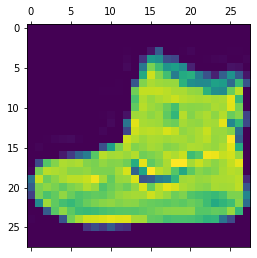

In [8]:
#to see how first image look
plt.matshow(x_train[0])

In [9]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

### Define the network architecture using Keras


### Creating the model
The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit”. Mathematically this function is defined as: y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if the input is positive.

The softmax function is another activation function. It changes input values into values that reach from 0 to 1.

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [14]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7467 - accuracy: 0.7580 - val_loss: 0.5786 - val_accuracy: 0.8050
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5179 - accuracy: 0.8221 - val_loss: 0.5170 - val_accuracy: 0.8195
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4712 - accuracy: 0.8375 - val_loss: 0.4897 - val_accuracy: 0.8279
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4444 - accuracy: 0.8458 - val_loss: 0.4717 - val_accuracy: 0.8358
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4259 - accuracy: 0.8518 - val_loss: 0.4508 - val_accuracy: 0.8401
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4114 - accuracy: 0.8576 - val_loss: 0.4391 - val_accuracy: 0.8438
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3998 - accuracy: 0.8610 - val_loss: 0.4288 - val_accuracy

### Evaluate the model

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.4065 - accuracy: 0.8577
Loss=0.407
Accuracy=0.858


### Making Prediction on New Data

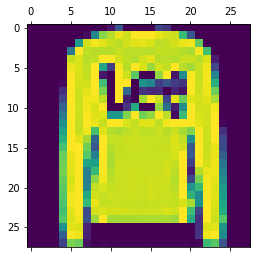

In [16]:
plt.matshow(x_test[1])

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
#we use predict() on new data
predicted_value=model.predict(x_test)
#print("Image is= %d" %np.argmax(predicted_value[0]))

313/313 [==============================] - 1s 3ms/step


In [19]:
predicted_value.shape

(10000, 10)

In [20]:
predicted_value[1]

array([2.0607494e-04, 1.4748664e-06, 9.6010488e-01, 1.1479334e-05,
       1.1965290e-02, 3.1886077e-10, 2.7582949e-02, 1.8312394e-12,
       1.2792433e-04, 9.4292095e-11], dtype=float32)

In [21]:
np.argmax(predicted_value[1])

2

In [22]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [23]:
class_labels[np.argmax(predicted_value[1])]

'Pullover'

### Plot graph for Accuracy and Loss

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

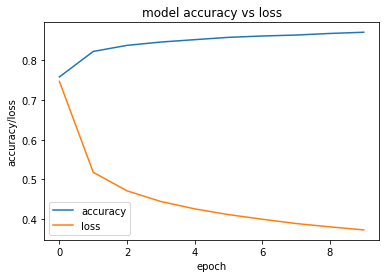

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='best')
plt.show()

 graph representing the model’s accuracy vs loss

 Conclusion: With above code We can see, that throughout the epochs, our model accuracy 
     increases and our model loss decreases,that is good since our model gains confidence
     with its predictions.